In [5]:
from periomod.base import Patient, Side, Tooth
from periomod.wrapper import BenchmarkWrapper, EvaluatorWrapper

wrapper = BenchmarkWrapper(
    task="pdgrouprevaluation",
    encodings=["target", "one_hot"],
    learners=["xgb", "lr", "rf", "mlp"],
    tuning_methods=["holdout"],
    hpo_methods=["hebo", "rs"],
    criteria=["macro_f1", "brier_score"],
    sampling=[None, "upsampling", "downsampling", "smote"],
    factor=2,
    n_configs=50,
    n_jobs=-1,
)

wrapper.baseline()

,Model,Encoding,Macro F1,Accuracy,Class F1 Scores,Multiclass Brier Score
0,Dummy Classifier,target,0.309556,0.866835,"[0.9286682795841863, 0.0, 0.0]",0.118838
1,Logistic Regression,target,0.524947,0.882023,"[0.9444214819101154, 0.31785480706344016, 0.31...",0.083490
2,Random Forest,target,0.527382,0.881924,"[0.9437143565583933, 0.3228580879920609, 0.315...",0.084731
3,Dummy Classifier,one_hot,0.309556,0.866835,"[0.9286682795841863, 0.0, 0.0]",0.118838
4,Logistic Regression,one_hot,0.523091,0.881427,"[0.9442239858906526, 0.3131976362442548, 0.311...",0.083658
5,Random Forest,one_hot,0.497956,0.878152,"[0.9407149323749692, 0.2928498118371536, 0.260...",0.085777


In [ ]:
benchmark, learners = wrapper.wrapped_benchmark()
wrapper.save_benchmark(
    benchmark_df=benchmark,
    file_name="pdgrouprevaluation_experiments.csv",
    folder_name="pdgrouprevaluation",
)
wrapper.save_learners(
    learners_dict=learners, folder_name="pdgrouprevaluation_experiments"
)

In [2]:
from periomod.wrapper import load_benchmark, load_learners

benchmark = load_benchmark(file_name="pdgrouprevaluation_experiments.csv",
                           folder_name="pdgrouprevaluation")
learners = load_learners(folder_name="pdgrouprevaluation_experiments")

In [3]:
benchmark

,Task,Learner,Tuning,HPO,Criterion,Sampling,Factor,Macro F1,Accuracy,Class F1 Scores,Multiclass Brier Score
0,pdgrouprevaluation,xgb,holdout,hebo,macro_f1,upsampling,2,0.5764,0.8726,[0.94118319 0.43376375 0.35412844],0.0904
1,pdgrouprevaluation,xgb,holdout,hebo,macro_f1,smote,2,0.5724,0.8747,[0.94239501 0.41408805 0.36077706],0.0889
2,pdgrouprevaluation,xgb,holdout,hebo,macro_f1,NaN,2,0.5380,0.8814,[0.94510727 0.3239391 0.34501845],0.0838
3,pdgrouprevaluation,xgb,holdout,hebo,macro_f1,downsampling,2,0.5031,0.8752,[0.94029687 0.1631664 0.4058193 ],0.0986
4,pdgrouprevaluation,xgb,holdout,hebo,macro_f1,smote,2,0.5508,0.8818,[0.94626766 0.34201443 0.36426713],0.0838
...,...,...,...,...,...,...,...,...,...,...,...
117,pdgrouprevaluation,mlp,holdout,rs,brier_score,smote,2,0.5831,0.8737,[0.94219555 0.36384181 0.44335664],0.0874
118,pdgrouprevaluation,mlp,holdout,rs,brier_score,NaN,2,0.5316,0.8747,[0.94019741 0.25684211 0.39780736],0.0875
119,pdgrouprevaluation,mlp,holdout,rs,brier_score,upsampling,2,0.5893,0.8744,[0.94296103 0.38719915 0.43783371],0.0879
120,pdgrouprevaluation,mlp,holdout,rs,brier_score,downsampling,2,0.4934,0.8782,[0.94228723 0.07888631 0.45917001],0.0857


In [3]:
evaluator = EvaluatorWrapper(
    learners_dict=learners,
    criterion="macro_f1",
    aggregate=True,
)
evaluator.encoding

'target'

In [5]:
evaluator.average_over_splits()

,Task,Learner,Criterion,Sampling,Factor,Macro F1,Accuracy,Class F1 Scores,Multiclass Brier Score
0,pdgrouprevaluation,rf,macro_f1,smote,2.0,0.5645,0.8032,"[0.8954870249613842, 0.39207525053886816, 0.40...",0.1396


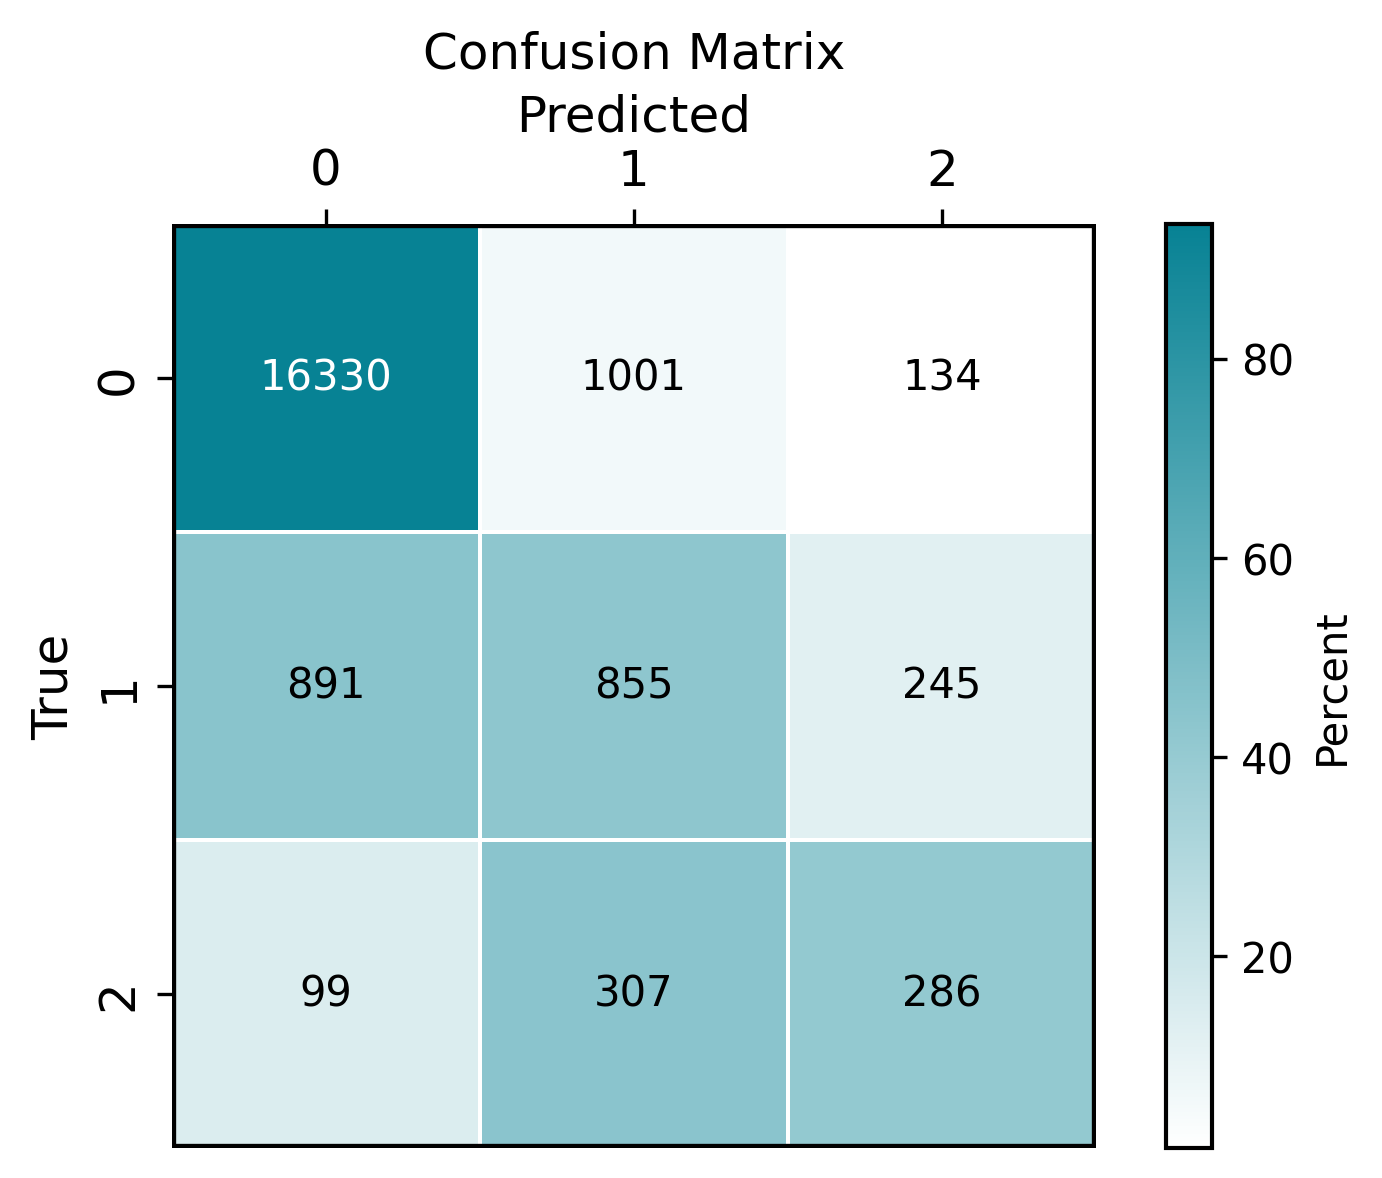

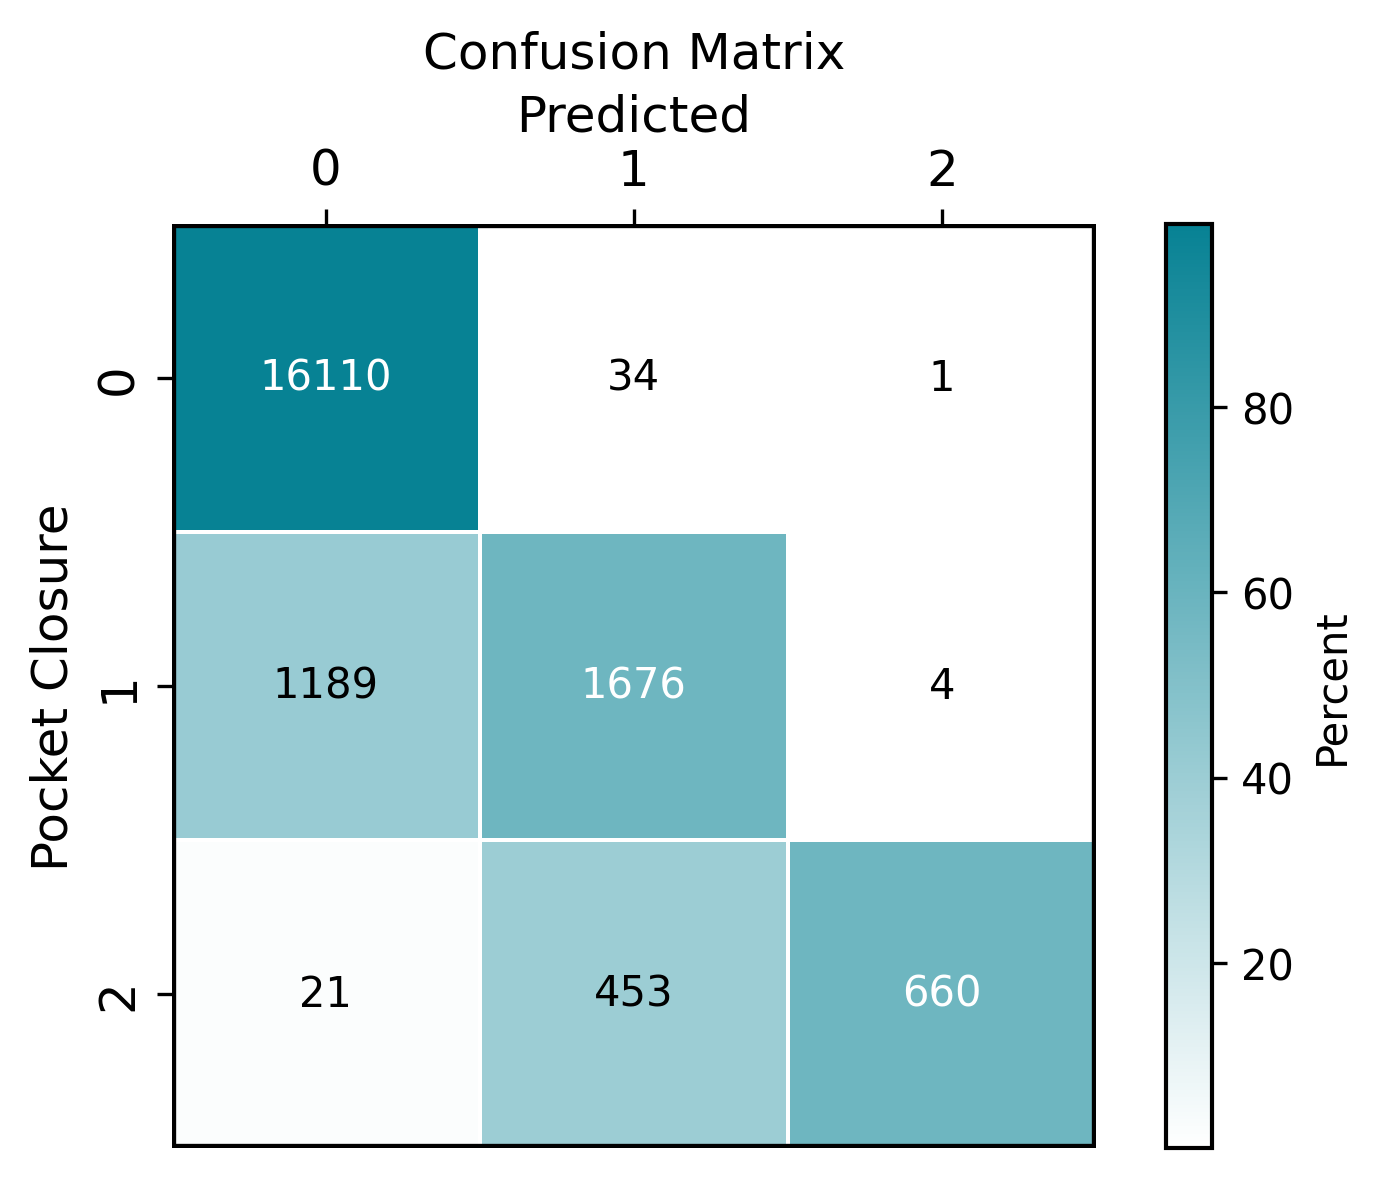

Average and Median Brier Scores by y:
   y      mean    median
0  0  0.032554  0.001389
1  1  0.250720  0.200462
2  2  0.243802  0.223392


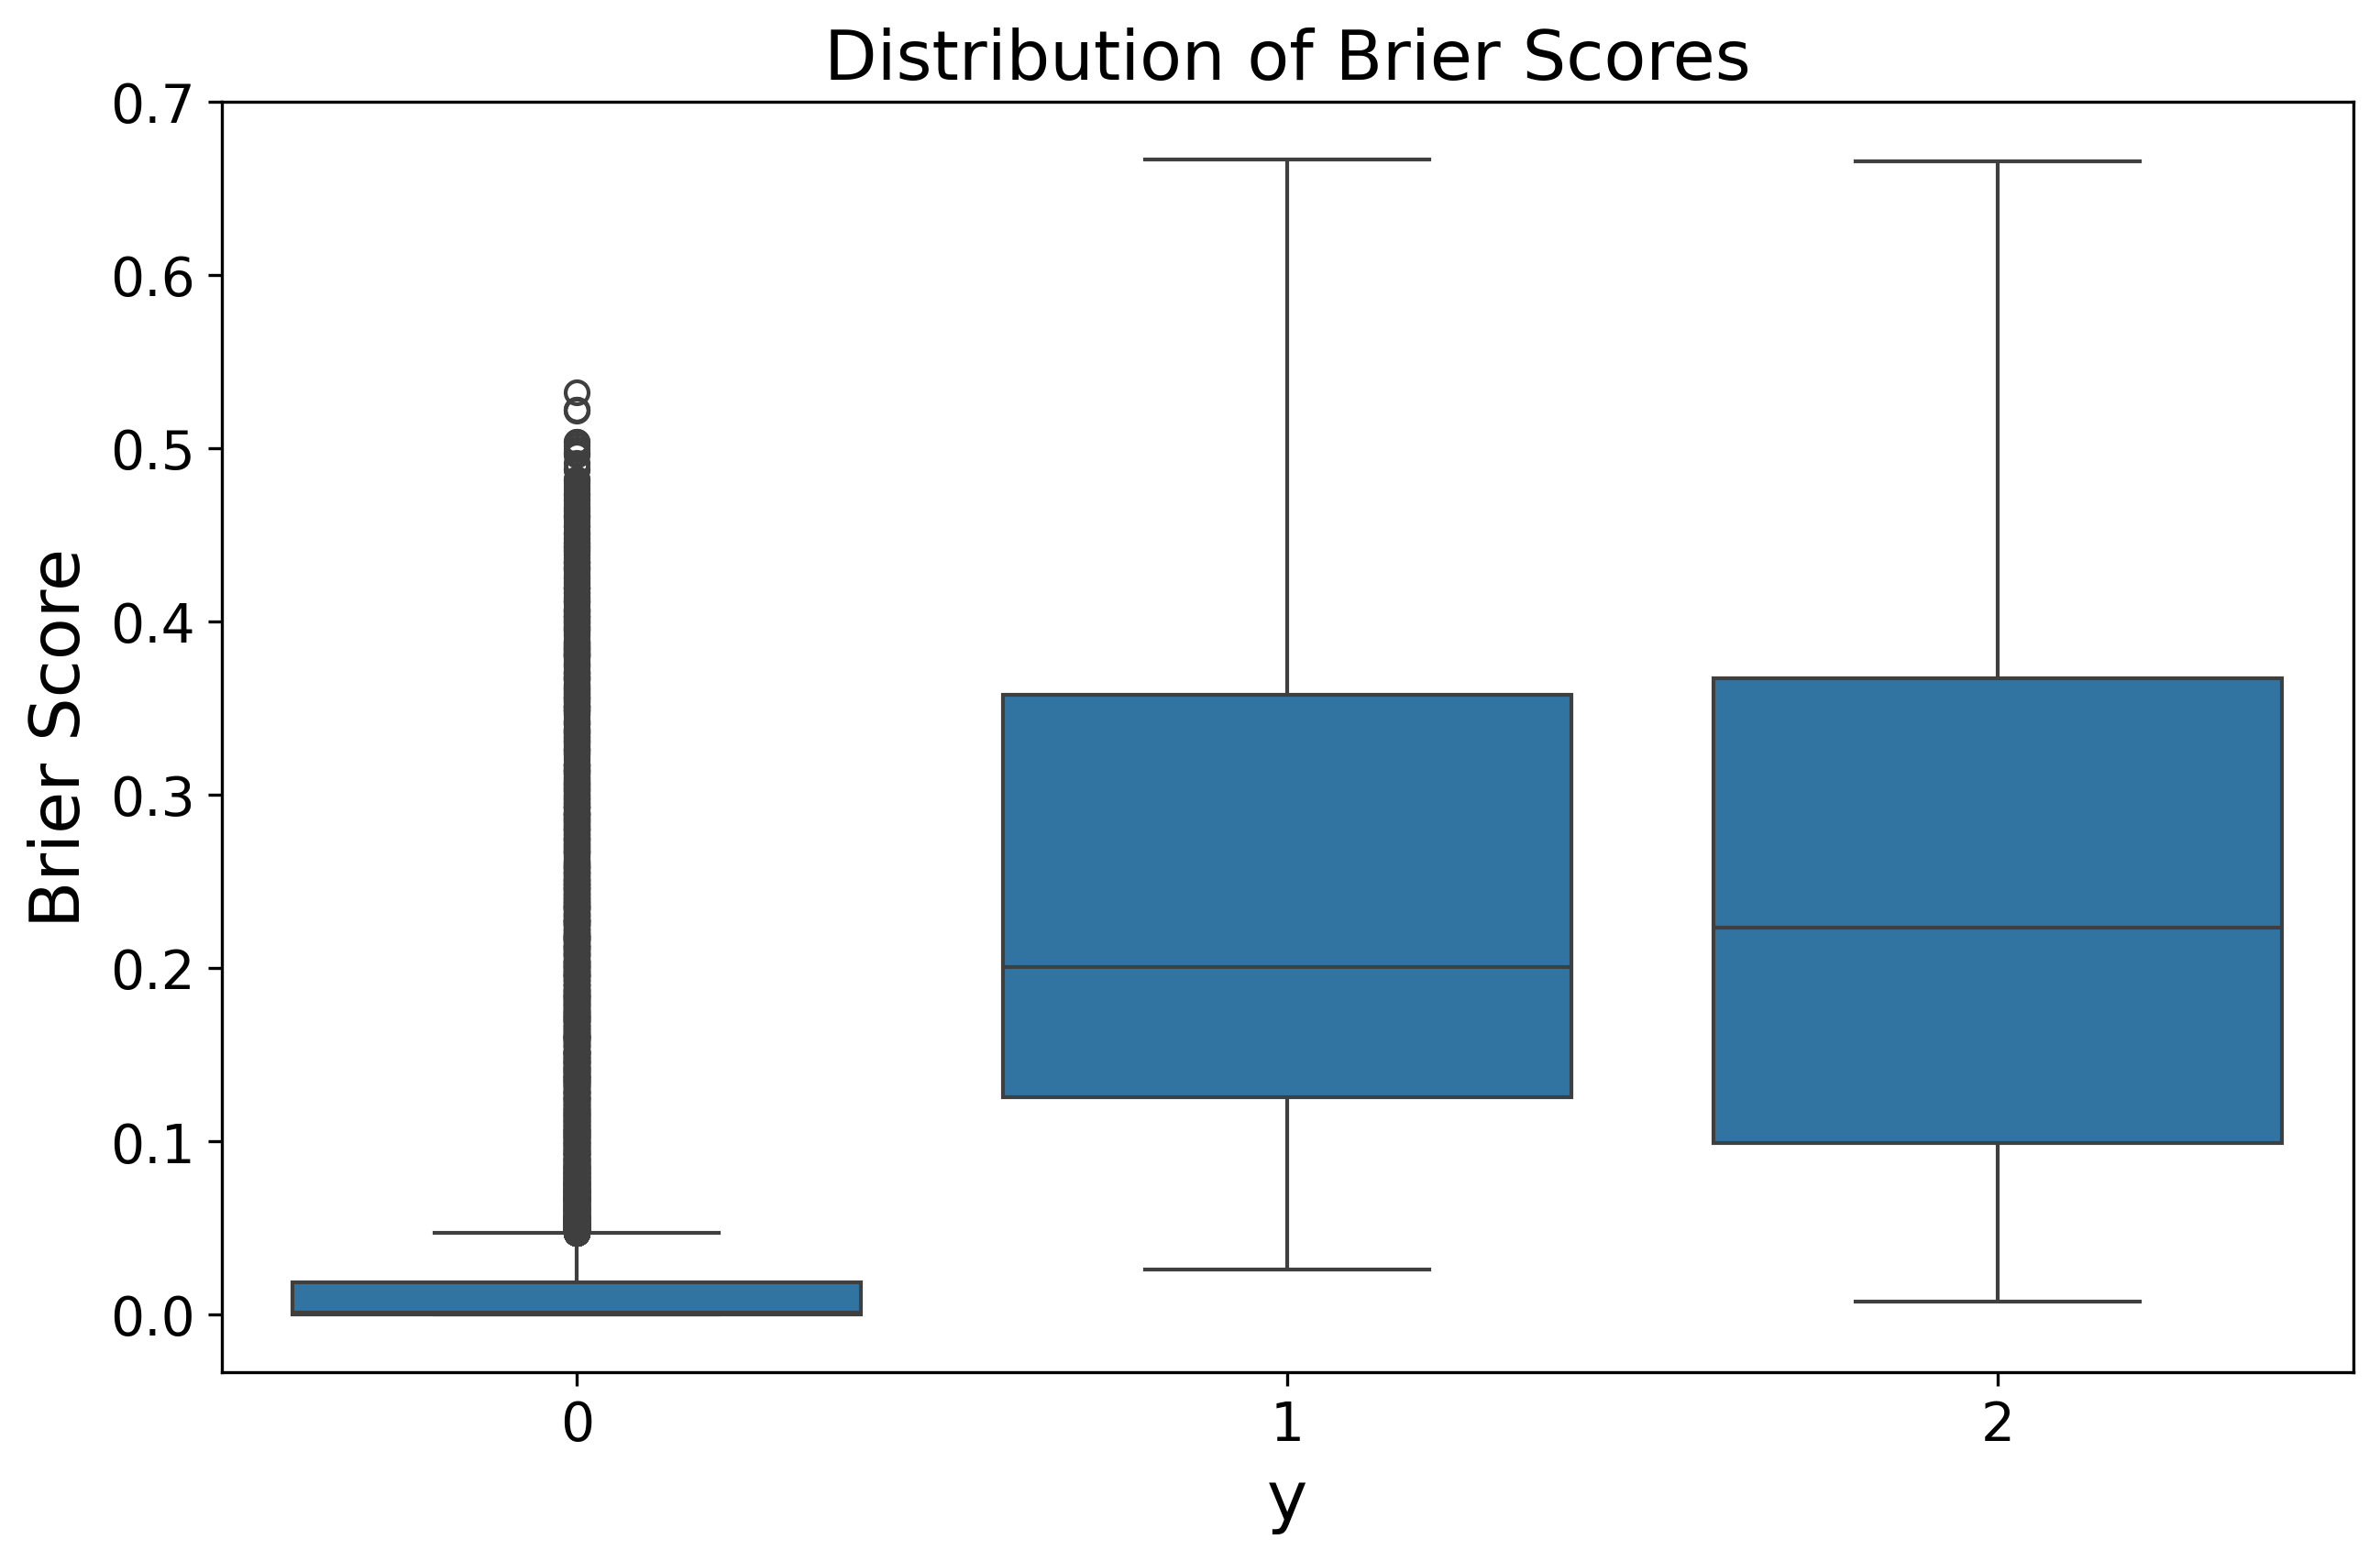


Mean Brier Score per cluster:
 Cluster
0    0.179404
1    0.127275
2    0.044102
Name: Brier_Score, dtype: float64 

Number of observations per cluster:
 Cluster
0     4307
1     2769
2    13072
Name: count, dtype: int64


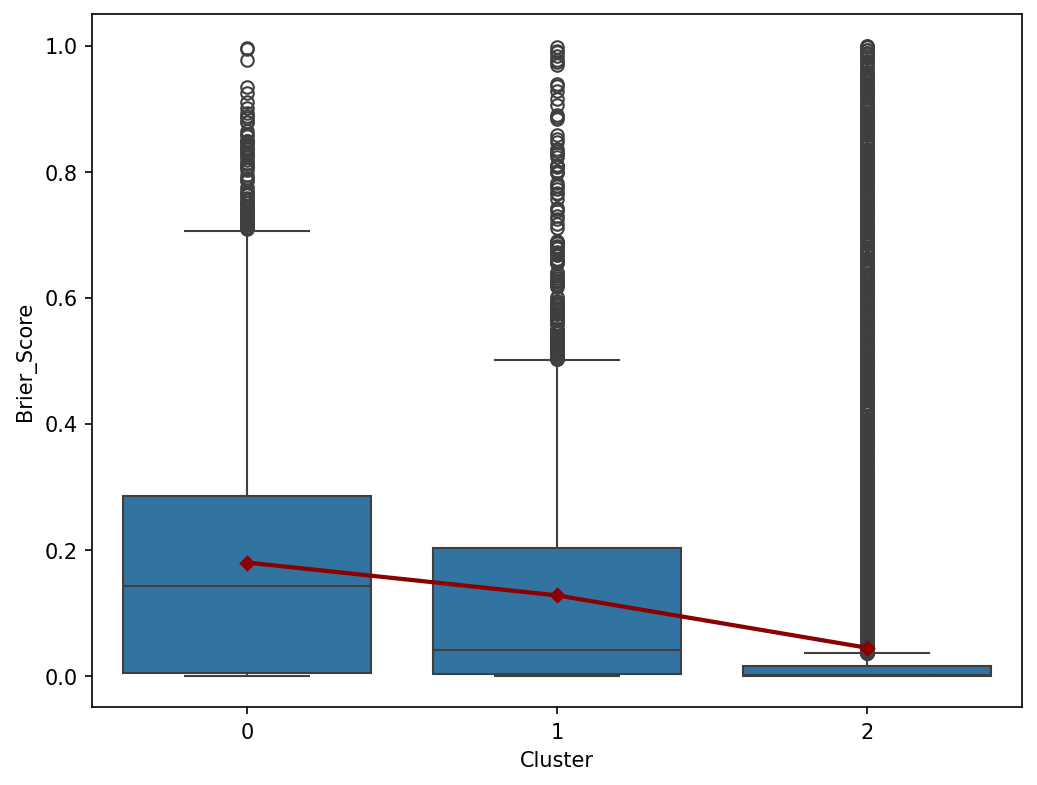

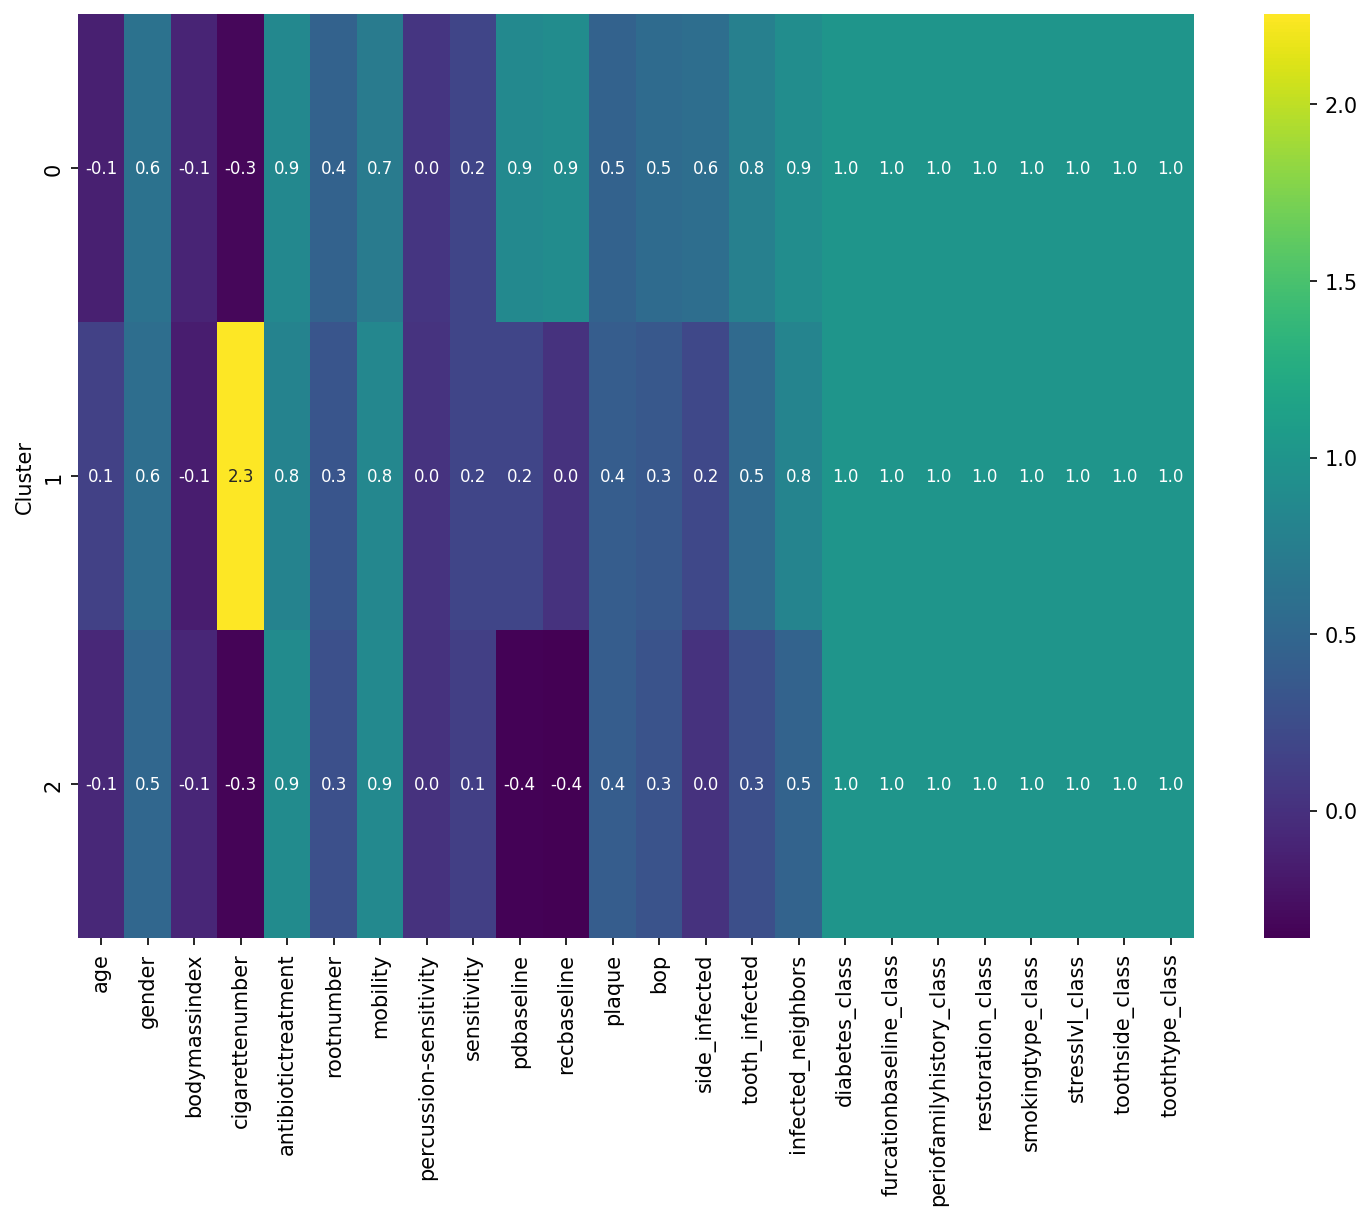

In [4]:
evaluator.wrapped_evaluation()

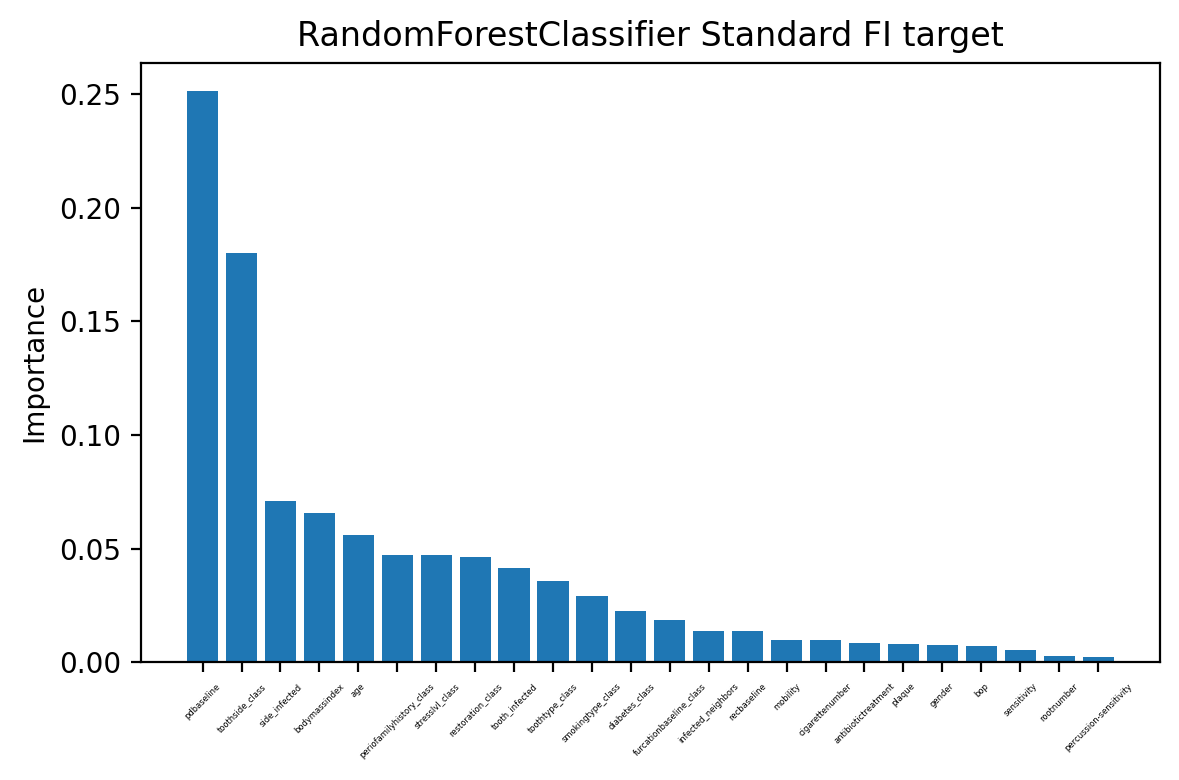

In [6]:
evaluator.evaluate_feature_importance(fi_types=["standard"])

In [8]:
patient = Patient(
    age=45,
    gender=1,
    bodymassindex=23.5,
    periofamilyhistory=1,
    diabetes=0,
    smokingtype=2,
    cigarettenumber=10,
    antibiotictreatment=0,
    stresslvl=2,
    teeth=[
        Tooth(
            tooth=11,
            toothtype=1,
            rootnumber=1,
            mobility=1,
            restoration=0,
            percussion=0,
            sensitivity=1,
            sides=[
                Side(
                    furcationbaseline=1,
                    side=1,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=2,
                    pdbaseline=3,
                    recbaseline=3,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=3,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=1,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=4,
                    pdbaseline=4,
                    recbaseline=4,
                    plaque=0,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=5,
                    pdbaseline=3,
                    recbaseline=3,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=6,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=0,
                    bop=1,
                ),  # noqa: E501
            ],
        ),
        Tooth(
            tooth=18,
            toothtype=3,
            rootnumber=2,
            mobility=0,
            restoration=1,
            percussion=1,
            sensitivity=0,
            sides=[
                Side(
                    furcationbaseline=3,
                    side=1,
                    pdbaseline=4,
                    recbaseline=5,
                    plaque=2,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=2,
                    pdbaseline=3,
                    recbaseline=3,
                    plaque=2,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=3,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=0,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=4,
                    pdbaseline=4,
                    recbaseline=4,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=5,
                    pdbaseline=5,
                    recbaseline=5,
                    plaque=0,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=3,
                    side=6,
                    pdbaseline=4,
                    recbaseline=4,
                    plaque=2,
                    bop=1,
                ),  # noqa: E501
            ],
        ),
    ],
)

_, output, results = evaluator.wrapped_patient_inference(patient)  # noqa: E501
output  # noqa: E501

,tooth,side,prediction,probability
0,11,1,0,0.977159
1,11,2,0,0.996926
2,11,3,0,0.982596
3,11,4,0,0.516401
4,11,5,0,0.992797
5,11,6,0,0.978367
6,18,1,1,0.726115
7,18,2,0,0.967754
8,18,3,0,0.921422
9,18,4,1,0.674066


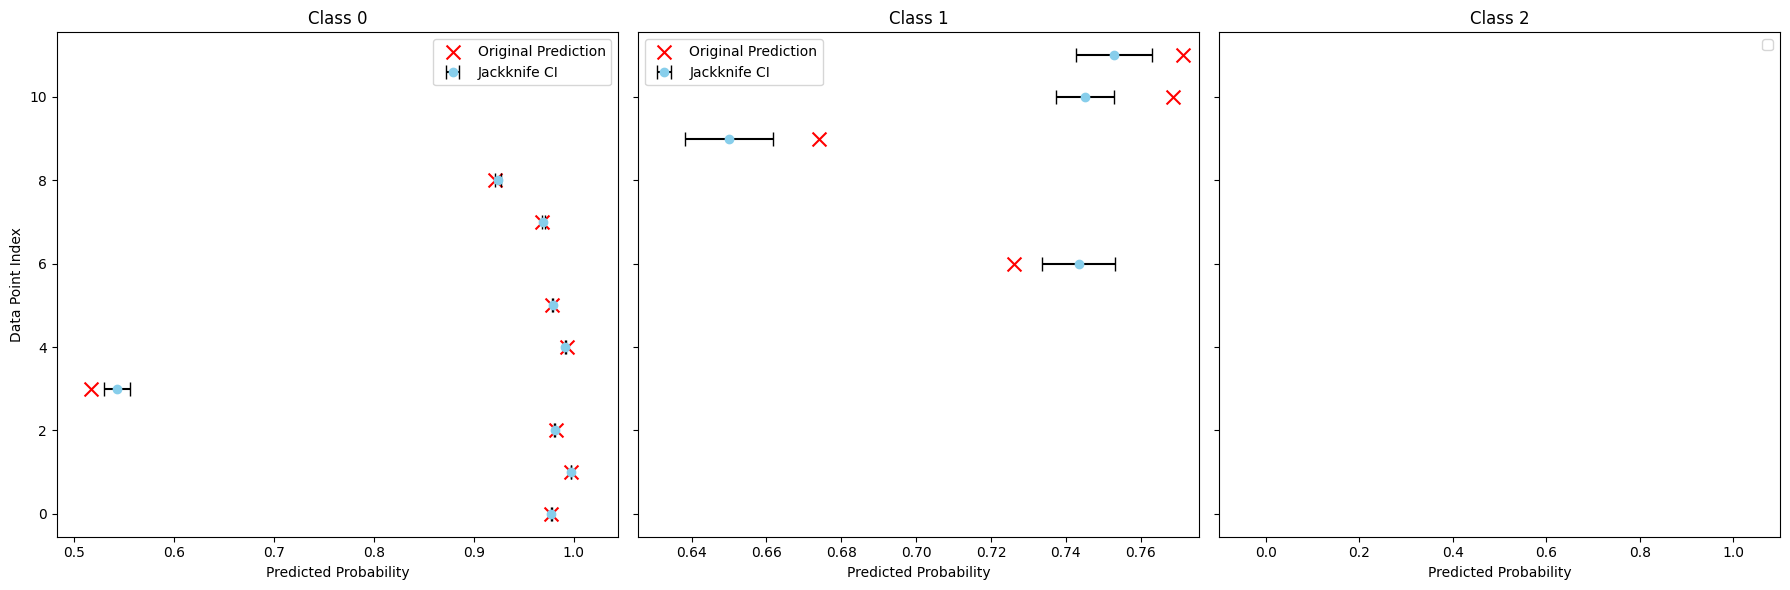

In [9]:
_, ci_plot = evaluator.wrapped_jackknife(patient, results, sample_fraction=0.1)